In [1]:
import math
import torch
from d2l import torch as d2l

In [2]:
d2l.set_figsize()
gammas = [0.95, 0.9, 0.8, 0.7]

Text(0.5, 0, 'time')

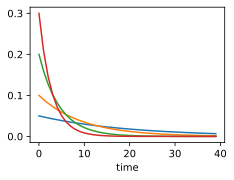

In [3]:
for gamma in gammas:
    x = torch.arange(40).detach().numpy()
    d2l.plt.plot(x, (1 - gamma) * gamma**x, label=f'gamma = {gamma:.2f}')
d2l.plt.xlabel('time')

In [4]:
def rmsprop_2d(x1, x2, s1, s2):
    g1, g2, eps = 0.2 * x1, 4 * x2, 1e-6
    s1 = gamma * s1 + (1 - gamma) * g1**2
    s2 = gamma * s2 + (1 - gamma) * g2**2
    x1 -= eta / math.sqrt(s1 + eps) * g1
    x2 -= eta / math.sqrt(s2 + eps) * g2
    return x1, x2, s1, s2

In [5]:
def f_2d(x1, x2):
    return 0.1 * x1**2 + 2 * x2**2

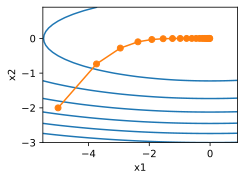

In [6]:
eta, gamma = 0.4, 0.9
d2l.show_trace_2d(f_2d, d2l.train_2d(rmsprop_2d))

In [7]:
def init_rmsprop_states(feature_dim):
    s_w = torch.zeros((feature_dim, 1))
    s_b = torch.zeros(1)
    return (s_w, s_b)

In [8]:
def rmsprop(params, states, hyperparams):
    gamma, eps = hyperparams['gamma'], 1e-6
    for p, s in zip(params, states):
        with torch.no_grad():
            s[:] = gamma * s + (1 - gamma) * torch.square(p.grad)
            p[:] -= hyperparams['lr'] * p.grad / torch.sqrt(s + eps)
        p.grad.data.zero_()

In [9]:
data_iter, feature_dim = d2l.get_data_ch11(batch_size=10)

loss: 0.248, 0.010 sec/epoch


([0.030999183654785156,
  0.03899788856506348,
  0.04599571228027344,
  0.0529935359954834,
  0.060016632080078125,
  0.06703925132751465,
  0.07603693008422852,
  0.08403658866882324,
  0.09105992317199707,
  0.10455179214477539,
  0.11157631874084473,
  0.11956286430358887,
  0.12756013870239258,
  0.13555693626403809,
  0.14457941055297852],
 [0.3321505822738012,
  0.28273098238309224,
  0.256189309835434,
  0.24951801325877507,
  0.2508692569235961,
  0.24803270061810812,
  0.24422325479984283,
  0.24758066534996032,
  0.24677606550852457,
  0.24628755829731624,
  0.24321210650602976,
  0.24537334285179774,
  0.24534516994158426,
  0.24280926859378815,
  0.24823542296886444])

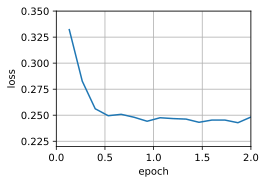

In [10]:
d2l.train_ch11(rmsprop, init_rmsprop_states(feature_dim), {'lr': 0.01, 'gamma': 0.9}, data_iter, feature_dim)

loss: 0.252, 0.007 sec/epoch


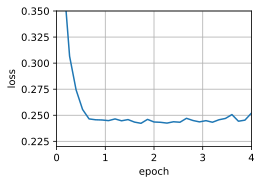

In [11]:
trainer = torch.optim.RMSprop
d2l.train_concise_ch11(trainer, {'lr': 0.01, 'alpha': 0.9}, data_iter)